In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
import sys
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install  scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# LOAD DATA

In [8]:
train = pd.read_csv("./input/Train_data.csv")
test = pd.read_csv("./input/Test_data.csv")

In [9]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [10]:
print(test.head(4))
print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

# EXPLORATORY ANALYSIS

In [11]:
# Descriptive statistics
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

num_outbound_cmds
0    25192
Name: count, dtype: int64
num_outbound_cmds
0    22544
Name: count, dtype: int64


In [13]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [14]:
# Attack Class Distribution
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

# SCALING NUMERICAL ATTRIBUTES

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

# ENCODING CATEGORICAL ATTRIBUTES

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()


In [17]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [18]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 40)

# FEATURE SELECTION

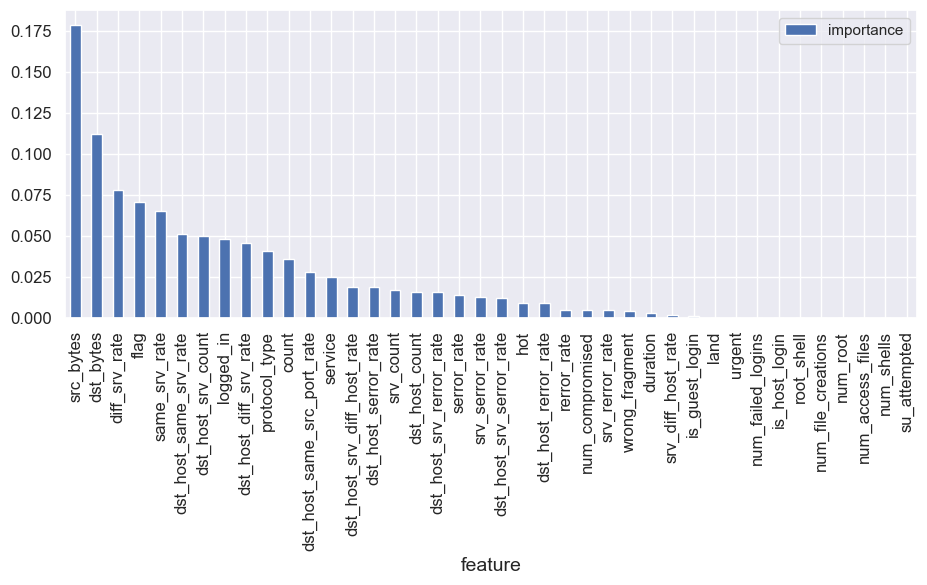

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [20]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

# DATASET PARTITION

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

# FITTING MODELS

In [22]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# EVALUATE MODELS

In [23]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9960869883971739

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

# VALIDATING MODELS

In [24]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.906721354855782

Confusion matrix:
 [[2981  517]
 [ 188 3872]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9947075946017465

Confusion matrix:
 [[3483   15]
 [  25 4035]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99   

In [25]:
# PREDICTING FOR TEST DATA using KNN
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

# Extracting TP FP TN FN

In [26]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual.iat[i]==y_pred[i]=='anomaly':
           TP += 1
        if y_pred[i]=='anomaly' and y_actual.iat[i]!=y_pred[i]:
           FP += 1
        if y_actual.iat[i]==y_pred[i]=='normal':
           TN += 1
        if y_pred[i]=='normal' and y_actual.iat[i]!=y_pred[i]:
           FN += 1
        
    return (TP, FP, TN, FN)


for i, v in models:
    print("For model:", i)
    TP, FP, TN, FN = perf_measure(Y_test, v.predict(X_test))
    print ("TP:", TP, "\tFP:", FP, "\t\tTN:", TN, "\tFN:", FN)
    
    # Testing for first row
    #print ("Expected: ", Y_test.iloc[0], "Predicted: ", v.predict(X_test).reshape(1, -1)[0][0] )
    print()
    

For model: Naive Baye Classifier
TP: 2981 	FP: 188 		TN: 3872 	FN: 517

For model: Decision Tree Classifier
TP: 3483 	FP: 25 		TN: 4035 	FN: 15

For model: KNeighborsClassifier
TP: 3458 	FP: 23 		TN: 4037 	FN: 40

For model: LogisticRegression
TP: 3293 	FP: 135 		TN: 3925 	FN: 205



In [27]:
# Testing for second row
for i, v in models:
    print("For model: ", i)
    print ("Expected: ", Y_test.iloc[2], "\tPredicted: ", v.predict(X_test).reshape(1, -1)[0][2] )
    print()

For model:  Naive Baye Classifier
Expected:  anomaly 	Predicted:  normal

For model:  Decision Tree Classifier
Expected:  anomaly 	Predicted:  anomaly

For model:  KNeighborsClassifier
Expected:  anomaly 	Predicted:  anomaly

For model:  LogisticRegression
Expected:  anomaly 	Predicted:  anomaly



In [28]:
type(Y_test)

pandas.core.series.Series

# Functions to extract locations of FP, FN as a pandas series

In [29]:
def find_FP(y_actual, y_pred):
    FP = []

    for i in range(len(y_pred)): 
        if y_pred[i]=='anomaly' and y_actual.iat[i]!=y_pred[i]:
           FP.append(i)   
    return (pd.Series(FP))
    
def find_FN(y_actual, y_pred):
    FN = []

    for i in range(len(y_pred)): 
        if y_pred[i]=='normal' and y_actual.iat[i]!=y_pred[i]:
           FN.append(i)
    return (pd.Series(FN))


# Combining Naive Bayes and Decision Tree

## Getting FP and FN row location from NB output as pd.Series

In [30]:
FP_NB= find_FP(Y_test, models[0][1].predict(X_test))
print("Size of number of FP:", FP_NB.size) 
FN_NB= find_FN(Y_test, models[0][1].predict(X_test))
print("Size of number of FN:", FN_NB.size) 

# Testing 
FP_NB.head(4)

Size of number of FP: 188
Size of number of FN: 517


0     23
1     89
2    210
3    243
dtype: int64

## Getting FP FN row entry from X_test and Y_test as pd.DataFrame and pd.Series respectively

In [31]:
X_test_subset=[]
Y_test_subset=[]
for i in FP_NB:
    X_test_subset.append(X_test.iloc[i])
    Y_test_subset.append(Y_test.iat[i])
for i in FN_NB:
    X_test_subset.append(X_test.iloc[i])
    Y_test_subset.append(Y_test.iat[i])
    
X_test_sub=pd.DataFrame(X_test_subset)
Y_test_sub=pd.Series(Y_test_subset)
print("Size of X_test_sub:", X_test_sub.shape[0]) 
print("Size of Y_test_sub:", Y_test_sub.size) 

# To check for each false positive
#for i in FP_NB:
#    print ("Expected: ", Y_test.iloc[i], "Predicted: ", models[1][1].predict(X_test).reshape(1, -1)[0][i] )

Size of X_test_sub: 705
Size of Y_test_sub: 705


In [32]:
print(type(X_test)) 
X_test.head(4)

<class 'pandas.core.frame.DataFrame'>


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
2900,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,0.256462,-0.106238,1.595477,1.600209,-0.372186,-0.373098,-1.093102,-0.069243,-0.373886,0.732059,-0.985705,-1.113281,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.38514,-0.374281,1,46,5
11640,-0.113551,-0.010081,-0.03931,-0.00891,11.437678,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.048758,0.707928,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,0.732059,-0.325936,-0.467308,-0.334096,0.527134,-0.287993,-0.641804,-0.627365,-0.38514,-0.374281,2,46,9
16662,-0.113551,-0.010089,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.728964,-0.092439,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,3.523568,-1.823705,-0.262670,1.069663,-0.440940,2.764775,4.233915,-0.641804,-0.627365,-0.38514,-0.374281,0,13,9
21545,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,0.596565,-0.216634,1.595477,1.600209,-0.372186,-0.373098,-1.320567,0.042773,-0.373886,0.732059,-0.967630,-1.091006,-0.013561,-0.478183,-0.287993,1.603834,1.614454,-0.38514,-0.374281,1,63,5


In [33]:
print(type(X_test_sub))
X_test_sub.head(4)


<class 'pandas.core.frame.DataFrame'>


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
719,-0.113551,-0.010080,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.702802,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-0.933877,2.451110,-0.373886,0.732059,-0.777833,-0.912807,-0.387518,1.273014,-0.287993,-0.641804,-0.627365,-0.38514,-0.374281,0.0,13.0,9.0
19908,-0.113551,-0.009527,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.598155,-0.368427,-0.506005,-0.633978,-0.372186,-0.373098,-1.366060,3.515259,-0.373886,0.732059,-1.030895,-1.157831,-0.173828,0.948718,-0.287993,-0.641804,-0.627365,-0.38514,-0.374281,1.0,41.0,9.0
12516,-0.113551,-0.010080,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.694082,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.047609,3.011188,-0.373886,0.732059,-0.678415,-0.801432,-0.387518,1.694599,-0.287993,-0.641804,-0.627365,-0.38514,-0.374281,0.0,13.0,9.0
18475,-0.113551,-0.010017,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.667920,-0.313230,-0.640142,-0.633978,-0.372186,-0.373098,-0.092257,1.779016,-0.373886,0.732059,-0.823022,-0.957356,-0.387518,-0.089028,-0.287993,-0.641804,-0.627365,-0.38514,-0.374281,0.0,61.0,9.0


In [34]:
print(type(Y_test)) 
Y_test.head(4)

<class 'pandas.core.series.Series'>


2900     anomaly
11640    anomaly
16662    anomaly
21545    anomaly
Name: class, dtype: object

In [35]:
print(type(Y_test_sub))
Y_test_sub.head(4)

<class 'pandas.core.series.Series'>


0    normal
1    normal
2    normal
3    normal
dtype: object

# Validating the combined model

## Validating results for the FP FN subset in the combined model

In [36]:
accuracy = metrics.accuracy_score(Y_test_sub, models[1][1].predict(X_test_sub))
confusion_matrix = metrics.confusion_matrix(Y_test_sub, models[1][1].predict(X_test_sub))
classification = metrics.classification_report(Y_test_sub, models[1][1].predict(X_test_sub))
print()
print('============================== {} Model Test Results =============================='.format("NB -> DT"))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print() 


============================== NB -> DT Model Test Results ==============================

Model Accuracy:
 0.9687943262411347

Confusion matrix:
 [[508   9]
 [ 13 175]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98       517
      normal       0.95      0.93      0.94       188

    accuracy                           0.97       705
   macro avg       0.96      0.96      0.96       705
weighted avg       0.97      0.97      0.97       705




## Validating hybrid model, NB + DT

In [37]:
print("For Naive Bayes:")
TP_old, FP_old, TN_old, FN_old = perf_measure(Y_test, BNB_Classifier.predict(X_test))
print ("TP:", TP_old, "\tFP:", FP_old, "\t\tTN:", TN_old, "\tFN:", FN_old)

print()
print("For Naive Bayes -> Decision Tress:")
TP_new, FP_new, TN_new, FN_new = perf_measure(Y_test_sub, DTC_Classifier.predict(X_test_sub))
print ("TP:", TP_new, "\tFP:", FP_new, "\t\tTN:", TN_new, "\tFN:", FN_new)

print()
print("For Naive Bayes + Decision Tress:")
tp = TP_old +TP_new
fp = FP_new
tn = TN_old +TN_new
fn = FN_new
print ("TP:", tp, "\tFP:", fp, "\t\tTN:", tn, "\tFN:", fn)

For Naive Bayes:
TP: 2981 	FP: 188 		TN: 3872 	FN: 517

For Naive Bayes -> Decision Tress:
TP: 508 	FP: 13 		TN: 175 	FN: 9

For Naive Bayes + Decision Tress:
TP: 3489 	FP: 13 		TN: 4047 	FN: 9


## 1. Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
## 2. Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN
## 3. Precision (true positives / predicted positives) = TP / TP + FP
## 4. Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
## 5. Specificity (true negatives / all actual negatives) =TN / TN + FP

In [38]:
acc_old= (TP_old + TN_old) / (TP_old + FP_old + TN_old + FN_old)
mis_old= (FP_old + FN_old) / (TP_old + FP_old + TN_old + FN_old)
prec_old= TP_old / (TP_old + FP_old)
sen_old= TP_old / (TP_old + FN_old)
spec_old= TN_old / (TN_old + FP_old)

acc= (tp + tn) / (tp + fp + tn + fn)
mis= (fp + fn) / (tp + fp + tn + fn)
prec= tp / (tp + fp)
sen= tp / (tp + fn)
spec= tn / (tn + fp)

print ("Accuracy")
print ("Old: ", acc_old, "\tNew: ", acc)
print ("\nMisclassification")
print ("Old: ", mis_old, "\tNew: ", mis)
print ("\nPrecision")
print ("Old: ", prec_old, "\tNew: ", prec)
print ("\nSensitivity")
print ("Old: ", sen_old, "\tNew: ", sen)
print ("\nSpecificity")
print ("Old: ", spec_old, "\tNew: ", spec)

Accuracy
Old:  0.906721354855782 	New:  0.9970891770309606

Misclassification
Old:  0.09327864514421805 	New:  0.0029108229690394285

Precision
Old:  0.9406752918901862 	New:  0.9962878355225585

Sensitivity
Old:  0.8522012578616353 	New:  0.9974271012006861

Specificity
Old:  0.9536945812807882 	New:  0.9967980295566502


# Plotting Results

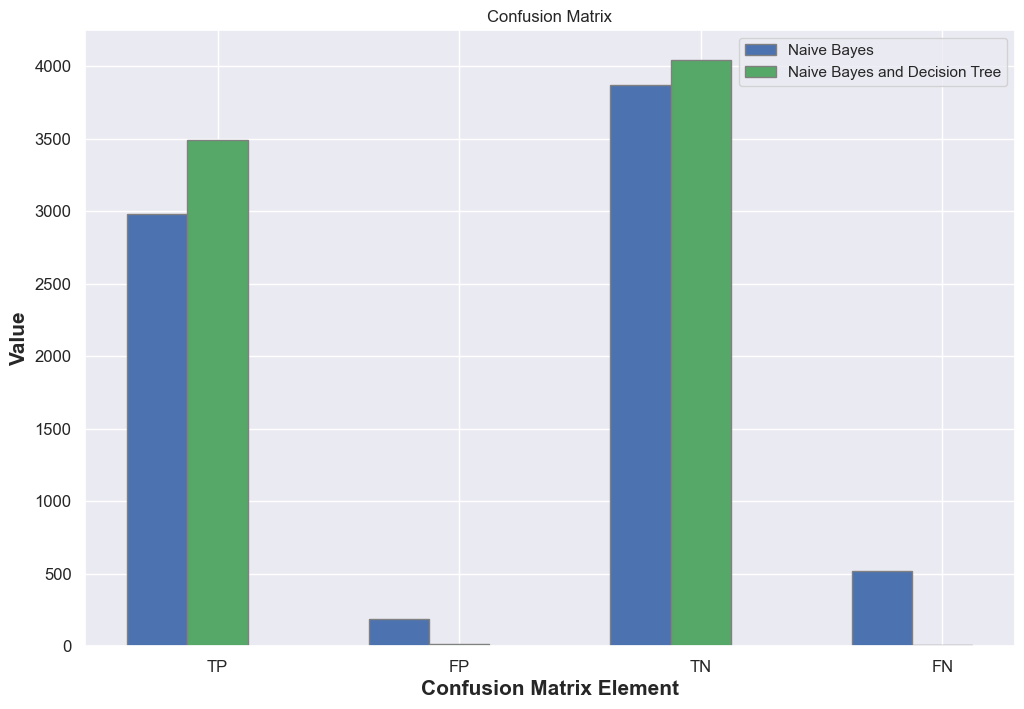

In [39]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
NB = [TP_old, FP_old, TN_old, FN_old]
NBandDT = [tp, fp, tn, fn]
 
# Set position of bar on X axis
br1 = np.arange(len(NB))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, NB, color ='b', width = barWidth, edgecolor ='grey', label ='Naive Bayes')
plt.bar(br2, NBandDT, color ='g', width = barWidth, edgecolor ='grey', label ='Naive Bayes and Decision Tree')
 
# Adding Xticks
plt.xlabel('Confusion Matrix Element', fontweight ='bold', fontsize = 15)
plt.ylabel('Value', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(NB))], ['TP', 'FP', 'TN', 'FN'])
 
plt.legend()
plt.title("Confusion Matrix")
plt.show()

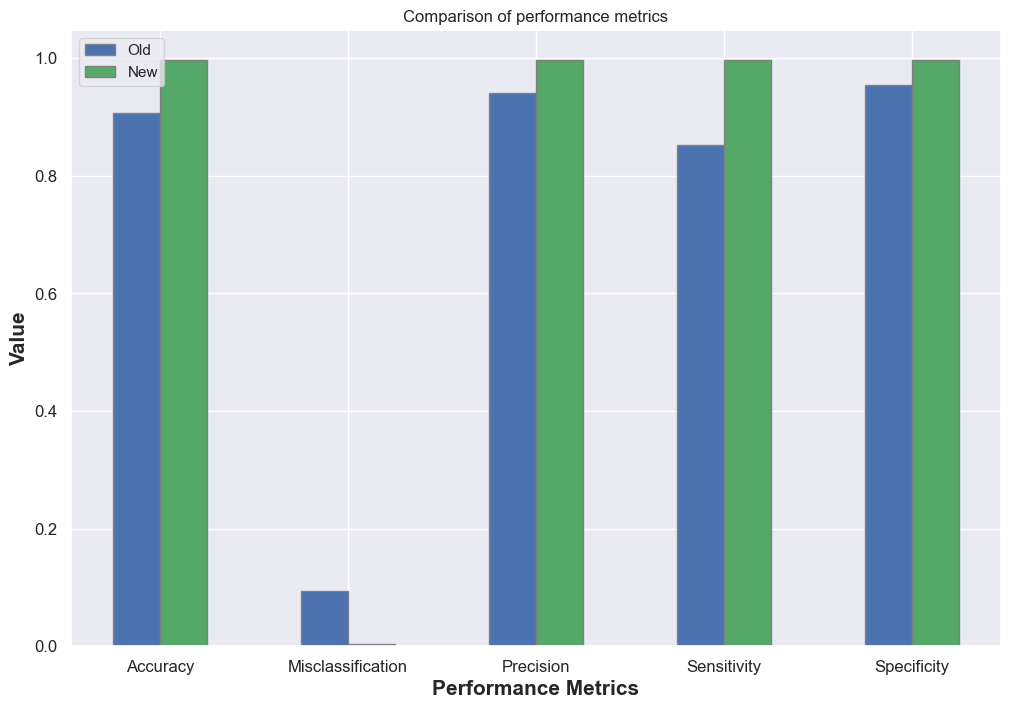

In [40]:
barWidth = 0.25
fig, ax = plt.subplots(figsize=(12, 8))

# Set height of bar
Old = [acc_old, mis_old, prec_old, sen_old, spec_old]
New = [acc, mis, prec, sen, spec]

# Set position of bar on X axis
br1 = np.arange(len(Old))
br2 = [x + barWidth for x in br1]

# Make the plot
ax.bar(br1, Old, color='b', width=barWidth, edgecolor='grey', label='Old')
ax.bar(br2, New, color='g', width=barWidth, edgecolor='grey', label='New')

# Adding Xticks
ax.set_xlabel('Performance Metrics', fontweight='bold', fontsize=15)
ax.set_ylabel('Value', fontweight='bold', fontsize=15)
ax.set_xticks([r + barWidth / 2 for r in range(len(Old))])
ax.set_xticklabels(['Accuracy', 'Misclassification', 'Precision', 'Sensitivity', 'Specificity'])

ax.legend()
ax.set_title("Comparison of performance metrics")
plt.show()

In [41]:
accPercent= ((acc- acc_old)/acc_old) *100
misPercent= ((mis_old- mis)/mis_old) *100
precPercent= ((prec- prec_old)/prec_old) *100
senPercent= ((sen- sen_old)/sen_old) *100
specPercent= ((spec- spec_old)/spec_old) *100

print ("Accuracy increase percentage: " ,accPercent, "%")
print ("Missclasification decrease percentage: " ,misPercent, "%")
print ("Precison increase percentage: ", precPercent, "%")
print ("Sensitivity increase percentage: ", senPercent, "%")
print ("Specificity increase percentage: ", specPercent, "%")

Accuracy increase percentage:  9.966438056325693 %
Missclasification decrease percentage:  96.87943262411348 %
Precison increase percentage:  5.911980904763097 %
Sensitivity increase percentage:  17.041261321704123 %
Specificity increase percentage:  4.519628099173545 %
